In [1]:
from bs4 import BeautifulSoup as bs
import regex

#lista nazw plików html

listaplikow = []

for i in range(1,10):
    listaplikow.append(f"flights0{i}.html")

for i in range(10,35):
    listaplikow.append(f"flights{i}.html")
listaplikow

['flights01.html',
 'flights02.html',
 'flights03.html',
 'flights04.html',
 'flights05.html',
 'flights06.html',
 'flights07.html',
 'flights08.html',
 'flights09.html',
 'flights10.html',
 'flights11.html',
 'flights12.html',
 'flights13.html',
 'flights14.html',
 'flights15.html',
 'flights16.html',
 'flights17.html',
 'flights18.html',
 'flights19.html',
 'flights20.html',
 'flights21.html',
 'flights22.html',
 'flights23.html',
 'flights24.html',
 'flights25.html',
 'flights26.html',
 'flights27.html',
 'flights28.html',
 'flights29.html',
 'flights30.html',
 'flights31.html',
 'flights32.html',
 'flights33.html',
 'flights34.html']

In [2]:
numerlotu = []
skad = []
dokad = []
status = []
dzien = []

for plik in listaplikow:
    #otwieranie pliku
    HTMLFile = open(plik, "r", encoding="utf-8")
    # read
    index = HTMLFile.read() 
    # tworzenie parsera
    Parse = bs(index, 'html')
    # znajdowanie hrefów z linkami zawierającymi informacje o lotach
    lista1 = Parse.find_all('tr')
    listawynikow=[]
    for item in lista1:
        try:
            info = str(item).split('/"')
            info1 = info[0].split('href="')
            link=info1[-1]
            delay=info[-1].split("statusLabel statusLabel--")
            delay1=delay[-1].split("</div")
            delay2=delay1[0]
            data=info[-1].split("?date=")
            data1=data[-1].split('"')
            data2=data1[0]
            exec=(link+"/"+delay2+"/"+data2)
            listawynikow.append(exec)
        except:
            pass
        for i in listawynikow:
            if str(i).startswith("/flights/"):
                lista= (i.split("/"))
                numerlotu.append(lista[2])
                skad.append(lista[3])
                dokad.append(lista[4])
                status.append(lista[5])
                dzien.append(lista[-1])


In [3]:
import pandas as pd

In [4]:
df = pd.DataFrame(list(zip(numerlotu, skad, dokad, status, dzien)), columns=['numer_lotu', 'skad', 'dokad', 'status', 'dzien'])
df

,numer_lotu,skad,dokad,status,dzien
0,lo6250,antalya,warsaw,"landed"">Landed",2022-05-01
1,lo6250,antalya,warsaw,"landed"">Landed",2022-05-01
2,lo724,tbilisi,warsaw,"delayed"">Landed Late",2022-05-01
3,lo6250,antalya,warsaw,"landed"">Landed",2022-05-01
4,lo724,tbilisi,warsaw,"delayed"">Landed Late",2022-05-01
...,...,...,...,...,...
2216779,lo3803,warsaw,rzesz%c3%b3w,"landed"">Landed",2022-05-19
2216780,lo10,chicago,krak%c3%b3w,"delayed"">Landed Late",2022-05-20
2216781,lo159,krak%c3%b3w,tel_aviv,"unknown"">Unknown",2022-05-20
2216782,ly9292,krak%c3%b3w,tel_aviv,"unknown"">Unknown",2022-05-20


In [5]:
df.sample(5)

,numer_lotu,skad,dokad,status,dzien
398883,lo232,brussels,warsaw,"landed"">Landed",2022-05-06
1585464,lo779,warsaw,vilnius,"scheduled"">Scheduled",2022-04-22
1768837,lo5604,athens,warsaw,"landed"">Landed",2022-04-26
1516017,tp7060,krak%c3%b3w,warsaw,"landed"">Landed",2022-04-21
1360718,lo152,tel_aviv,warsaw,"landed"">Landed",2022-04-19


In [6]:
df["skad"] = df["skad"].apply(
    lambda x: x.capitalize()
)

In [7]:
df["dokad"] = df["dokad"].apply(
    lambda x: x.capitalize()
)

In [8]:
df["skad"] = df["skad"].apply(
    lambda x: x.capitalize()
)

In [9]:
def konwersja_underscore_na_spacje(wartosc_ze_spacjami):
    underscore="_"
    nowa_wartosc=wartosc_ze_spacjami.replace(underscore, " ")
    return nowa_wartosc

In [10]:
def konwersja_polskich_znakow(wartosc_bez_znakow):
    nowa_wartosc = wartosc_bez_znakow.replace("%c5%82", "ł")
    nowa_wartosc = nowa_wartosc.replace("%c3%b3", "ó")
    nowa_wartosc = nowa_wartosc.replace("%c5%84", "ń")
    nowa_wartosc = nowa_wartosc.replace("%c3%bc", "ü")
    nowa_wartosc = nowa_wartosc.replace("%c3%ad", "i")
    nowa_wartosc = nowa_wartosc.replace("%c5%a1", "s")
    nowa_wartosc = nowa_wartosc.replace("%c5%9f", "s")
    nowa_wartosc = nowa_wartosc.replace("%c4%83", "a")
    nowa_wartosc = nowa_wartosc.replace("%c3%ba", "ú")
    nowa_wartosc = nowa_wartosc.replace("%c3%b6", "ö")
    nowa_wartosc = nowa_wartosc.replace("%c4%b0", "I")
    nowa_wartosc = nowa_wartosc.replace("%c3%a1", "a")
    return nowa_wartosc

In [11]:
df["skad"] = df["skad"].apply(konwersja_underscore_na_spacje)
df["dokad"] = df["dokad"].apply(konwersja_underscore_na_spacje)
df["skad"] = df["skad"].apply(konwersja_polskich_znakow)
df["dokad"] = df["dokad"].apply(konwersja_polskich_znakow)

In [12]:
df.replace("Goleniow", "Szczecin", inplace=True)
#lotnisko w Szczecinie to Szczecin-Goleniów
df.replace("Poland", "Olsztyn", inplace=True)
#nie czytał Olsztyna jako lotniska (Szymany), tylko wartość "Poland"

In [13]:
df
df["lot_miasta"] = df[['skad', 'dokad']].agg('-'.join, axis=1)

In [14]:
df['status'].unique()

array(['landed">Landed', 'delayed">Landed Late', 'cancelled">Cancelled',
       'unknown">Unknown', 'delayed">Departed Late', 'active">En-Route',
       'scheduled">Scheduled', 'diverted" data-lazy-link="',
       'diverted">Diverted', 'delayed" data-lazy-link="',
       'delayed">Delayed &gt;3h', 'delayed">Delayed &gt;1h',
       'delayed">Delayed'], dtype=object)

In [15]:
import numpy as np
df.replace('landed">Landed', 'landed', inplace=True)
df.replace('delayed">Landed Late', 'delayed landing', inplace=True)
df.replace('delayed">Departed Late', 'delayed departure', inplace=True)
df.replace('delayed" data-lazy-link="', 'delayed', inplace=True)
df.replace('delayed">Delayed &gt;3h', 'delayed', inplace=True)
df.replace('delayed">Delayed &gt;1h', 'delayed', inplace=True)
df.replace('delayed">Delayed', 'delayed', inplace=True)
df.replace('cancelled">Cancelled', 'cancelled', inplace=True)
df.replace('unknown">Unknown', np.nan, inplace=True)
df.replace('active">En-Route', np.nan, inplace=True)
df.replace('scheduled">Scheduled', np.nan, inplace=True)
df.replace('diverted" data-lazy-link="', 'diverted', inplace=True)
df.replace('diverted">Diverted', 'diverted', inplace=True)

In [16]:
df.sample(20)

,numer_lotu,skad,dokad,status,dzien,lot_miasta
1176611,lo536,Budapest,Warsaw,landed,2022-05-15,Budapest-Warsaw
2055745,lo3851,Warsaw,Wrocław,landed,2022-05-18,Warsaw-Wrocław
314668,tp7091,Warsaw,Vilnius,delayed landing,2022-05-05,Warsaw-Vilnius
1061639,tp7101,Warsaw,Zurich,landed,2022-05-14,Warsaw-Zurich
1007106,lo776,Vilnius,Warsaw,landed,2022-05-13,Vilnius-Warsaw
973036,bt5191,Riga,Warsaw,landed,2022-05-13,Riga-Warsaw
312,lo3852,Wrocław,Warsaw,landed,2022-05-01,Wrocław-Warsaw
640375,lx4501,Warsaw,Zurich,landed,2022-05-09,Warsaw-Zurich
2129868,tk8065,Warsaw,Rzeszów,landed,2022-05-19,Warsaw-Rzeszów
344239,os8539,Warsaw,Wrocław,landed,2022-05-06,Warsaw-Wrocław


In [17]:
df['dzientygodnia'] = pd.to_datetime(df['dzien'], format='%Y-%m-%d')


In [18]:
print (df.dtypes)

numer_lotu               object
skad                     object
dokad                    object
status                   object
dzien                    object
lot_miasta               object
dzientygodnia    datetime64[ns]
dtype: object


In [19]:
listadat=df['dzientygodnia']
listadodf=[]

In [20]:
for i in listadat:
    listadodf.append(i.weekday())
listadodf

[6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,


In [21]:
df['dzientygodnia']=listadodf

In [22]:
df['dzientygodnia'].unique()

array([6, 0, 1, 2, 3, 4, 5])

In [23]:
df.sample(20)

,numer_lotu,skad,dokad,status,dzien,lot_miasta,dzientygodnia
1831655,lo268,Amsterdam,Warsaw,landed,2022-04-29,Amsterdam-Warsaw,4
432222,lo417,Warsaw,Geneva,landed,2022-05-07,Warsaw-Geneva,5
1122091,sq2366,Amsterdam,Warsaw,delayed landing,2022-05-15,Amsterdam-Warsaw,6
2180548,lo3843,Warsaw,Wrocław,landed,2022-05-19,Warsaw-Wrocław,3
1449656,lo779,Warsaw,Vilnius,landed,2022-04-20,Warsaw-Vilnius,2
240301,lo282,London,Warsaw,landed,2022-05-05,London-Warsaw,3
416448,lo460,Copenhagen,Warsaw,landed,2022-05-07,Copenhagen-Warsaw,5
551970,bt5194,Warsaw,Riga,landed,2022-05-08,Warsaw-Riga,6
13546,nh6721,London,Warsaw,landed,2022-05-01,London-Warsaw,6
1944996,lo331,Warsaw,Paris,landed,2022-05-17,Warsaw-Paris,1


In [24]:
#do ML
data=df.iloc[:,[1,2,3,6]]
data

,skad,dokad,status,dzientygodnia
0,Antalya,Warsaw,landed,6
1,Antalya,Warsaw,landed,6
2,Tbilisi,Warsaw,delayed landing,6
3,Antalya,Warsaw,landed,6
4,Tbilisi,Warsaw,delayed landing,6
...,...,...,...,...
2216779,Warsaw,Rzeszów,landed,3
2216780,Chicago,Kraków,delayed landing,4
2216781,Kraków,Tel aviv,NaN,4
2216782,Kraków,Tel aviv,NaN,4


In [25]:
data=data.dropna()

In [26]:
data

,skad,dokad,status,dzientygodnia
0,Antalya,Warsaw,landed,6
1,Antalya,Warsaw,landed,6
2,Tbilisi,Warsaw,delayed landing,6
3,Antalya,Warsaw,landed,6
4,Tbilisi,Warsaw,delayed landing,6
...,...,...,...,...
2216777,Warsaw,Gdańsk,landed,3
2216778,Warsaw,Lublin,landed,3
2216779,Warsaw,Rzeszów,landed,3
2216780,Chicago,Kraków,delayed landing,4


In [27]:
data=pd.get_dummies(data)

In [28]:
data

,dzientygodnia,skad_Amsterdam,skad_Antalya,skad_Asunción,skad_Athens,skad_Babimost,skad_Barcelona,skad_Beirut,skad_Belgrad,skad_Berlin,...,dokad_Zadar,dokad_Zagreb,dokad_Zakynthos island,dokad_Zurich,status_cancelled,status_delayed,status_delayed departure,status_delayed landing,status_diverted,status_landed
0,6,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,6,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,6,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2216777,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2216778,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2216779,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2216780,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [29]:
df

,numer_lotu,skad,dokad,status,dzien,lot_miasta,dzientygodnia
0,lo6250,Antalya,Warsaw,landed,2022-05-01,Antalya-Warsaw,6
1,lo6250,Antalya,Warsaw,landed,2022-05-01,Antalya-Warsaw,6
2,lo724,Tbilisi,Warsaw,delayed landing,2022-05-01,Tbilisi-Warsaw,6
3,lo6250,Antalya,Warsaw,landed,2022-05-01,Antalya-Warsaw,6
4,lo724,Tbilisi,Warsaw,delayed landing,2022-05-01,Tbilisi-Warsaw,6
...,...,...,...,...,...,...,...
2216779,lo3803,Warsaw,Rzeszów,landed,2022-05-19,Warsaw-Rzeszów,3
2216780,lo10,Chicago,Kraków,delayed landing,2022-05-20,Chicago-Kraków,4
2216781,lo159,Kraków,Tel aviv,NaN,2022-05-20,Kraków-Tel aviv,4
2216782,ly9292,Kraków,Tel aviv,NaN,2022-05-20,Kraków-Tel aviv,4


In [30]:
df.dropna()

,numer_lotu,skad,dokad,status,dzien,lot_miasta,dzientygodnia
0,lo6250,Antalya,Warsaw,landed,2022-05-01,Antalya-Warsaw,6
1,lo6250,Antalya,Warsaw,landed,2022-05-01,Antalya-Warsaw,6
2,lo724,Tbilisi,Warsaw,delayed landing,2022-05-01,Tbilisi-Warsaw,6
3,lo6250,Antalya,Warsaw,landed,2022-05-01,Antalya-Warsaw,6
4,lo724,Tbilisi,Warsaw,delayed landing,2022-05-01,Tbilisi-Warsaw,6
...,...,...,...,...,...,...,...
2216777,os8519,Warsaw,Gdańsk,landed,2022-05-19,Warsaw-Gdańsk,3
2216778,lo3969,Warsaw,Lublin,landed,2022-05-19,Warsaw-Lublin,3
2216779,lo3803,Warsaw,Rzeszów,landed,2022-05-19,Warsaw-Rzeszów,3
2216780,lo10,Chicago,Kraków,delayed landing,2022-05-20,Chicago-Kraków,4


In [31]:
df.to_csv("wszystkieairportia.csv")

In [32]:
fd=df[~(df["status"]=="landed")]

In [33]:
#opóźnienia jeśli chodzi o lotniska z których wylatują samoloty - z jakich miast jest najmniej opóźnień?
df.groupby(["skad", "dzientygodnia", "status"]).agg(
    {"status": ["count"]}
)

status
                                           count
skad      dzientygodnia status                  
Amsterdam 0             delayed departure    456
                        delayed landing     1344
                        landed              3427
          1             delayed landing     1261
                        landed              4179
...                                          ...
Zurich    4             landed              3302
          5             delayed landing      339
                        landed              2996
          6             delayed landing      376
                        landed              2766

[868 rows x 1 columns]

In [34]:
opoznienia=fd.groupby(["skad", "dzientygodnia", "status"]).agg(
    {"status": ["count"]}
).reset_index()

In [35]:
opoznienia["dosortowania"]=opoznienia["status"]["count"]

In [36]:
opoznienia.sort_values(by="dosortowania", ascending=False).head(17)

skad dzientygodnia           status        dosortowania
                                                       count             
372             Warsaw             3  delayed landing  25018        25018
369             Warsaw             2  delayed landing  20545        20545
366             Warsaw             1  delayed landing  13562        13562
364             Warsaw             0  delayed landing  13105        13105
381             Warsaw             6  delayed landing  12742        12742
377             Warsaw             4  delayed landing  11141        11141
379             Warsaw             5  delayed landing  10443        10443
336            Toronto             3  delayed landing   3729         3729
320           Tel aviv             3  delayed landing   3726         3726
95   Frankfurt-am-main             1  delayed landing   3403         3403
335            Toronto             2  delayed landing   3248         3248
334            Toronto             1  delayed landing   3222         3222
9            Amsterdam             6  delayed landing   2943         2943
333            Toronto             0  delayed landing   2758         2758
317           Tel aviv             0  delayed landing   2703         2703
4            Amsterdam             3  delayed landing   2635         2635
176             London             6  delayed landing   2548         2548

In [37]:
opoznienia1=fd.groupby(["dokad", "dzientygodnia", "status"]).agg(
    {"status": ["count"]}
).reset_index()
opoznienia1["dosortowania"]=opoznienia1["status"]["count"]
opoznienia1.sort_values(by="dosortowania", ascending=False).head(17)

dokad dzientygodnia             status        dosortowania
                                                count             
290    Warsaw             3    delayed landing  38320        38320
286    Warsaw             2    delayed landing  30118        30118
284    Warsaw             1    delayed landing  29273        29273
295    Warsaw             4    delayed landing  24076        24076
282    Warsaw             0    delayed landing  23140        23140
303    Warsaw             6    delayed landing  21893        21893
299    Warsaw             5    delayed landing  21404        21404
294    Warsaw             4  delayed departure   4042         4042
287    Warsaw             3          cancelled   4028         4028
281    Warsaw             0  delayed departure   2954         2954
120    Kraków             3    delayed landing   2655         2655
292    Warsaw             4          cancelled   2298         2298
25     Bodrum             3    delayed landing   2232         2232
117    Kraków             1    delayed landing   2146         2146
116    Kraków             0    delayed landing   2061         2061
133    London             3    delayed landing   2001         2001
247  Tel aviv             3    delayed landing   1826         1826

In [38]:
opoznienia2=fd.groupby(["lot_miasta", "dzientygodnia", "status"]).agg(
    {"status": ["count"]}
).reset_index()
opoznienia2["dosortowania"]=opoznienia2["status"]["count"]
opoznienia2.sort_values(by="dosortowania", ascending=False).head(17)

lot_miasta dzientygodnia           status        \
                                                             count   
370            Toronto-Warsaw             3  delayed landing  3729   
100  Frankfurt-am-main-Warsaw             1  delayed landing  3403   
356           Tel aviv-Warsaw             3  delayed landing  3250   
369            Toronto-Warsaw             2  delayed landing  3248   
368            Toronto-Warsaw             1  delayed landing  3222   
9            Amsterdam-Warsaw             6  delayed landing  2943   
367            Toronto-Warsaw             0  delayed landing  2758   
4            Amsterdam-Warsaw             3  delayed landing  2635   
201             London-Warsaw             6  delayed landing  2470   
197             London-Warsaw             3  delayed landing  2437   
199             London-Warsaw             4  delayed landing  2415   
353           Tel aviv-Warsaw             0  delayed landing  2352   
176             Kraków-Warsaw             2  delayed landing  2209   
509             Warsaw-Kraków             3  delayed landing  2179   
109             Gdańsk-Warsaw             2  delayed landing  2110   
372            Toronto-Warsaw             4  delayed landing  2011   
102  Frankfurt-am-main-Warsaw             4  delayed landing  2001   

    dosortowania  
                  
370         3729  
100         3403  
356         3250  
369         3248  
368         3222  
9           2943  
367         2758  
4           2635  
201         2470  
197         2437  
199         2415  
353         2352  
176         2209  
509         2179  
109         2110  
372         2011  
102         2001

In [39]:
df.groupby(["lot_miasta", "dzientygodnia", "status"]).count()

numer_lotu  skad  dokad  \
lot_miasta       dzientygodnia status                                       
Amsterdam-Warsaw 0             delayed departure         456   456    456   
                               delayed landing          1344  1344   1344   
                               landed                   3427  3427   3427   
                 1             delayed landing          1261  1261   1261   
                               landed                   4179  4179   4179   
...                                                      ...   ...    ...   
Zurich-Warsaw    4             landed                   3302  3302   3302   
                 5             delayed landing           339   339    339   
                               landed                   2996  2996   2996   
                 6             delayed landing           376   376    376   
                               landed                   2766  2766   2766   

                                                  dzien  
lot_miasta       dzientygodnia status                    
Amsterdam-Warsaw 0             delayed departure    456  
                               delayed landing     1344  
                               landed              3427  
                 1             delayed landing     1261  
                               landed              4179  
...                                                 ...  
Zurich-Warsaw    4             landed              3302  
                 5             delayed landing      339  
                               landed              2996  
                 6             delayed landing      376  
                               landed              2766  

[1655 rows x 4 columns]

In [40]:
#jakie loty mają najwięcej opóźnień? 
#df.groupby(["lot_miasta", "dzientygodnia", "status"]).agg(
# {"status": ["count"]}
# ).sort_values(
    #by=("count"),
    #ascending=False
#)

In [41]:
#jakie loty mają najwięcej opóźnień? 
xd=df.groupby(["lot_miasta", "dzientygodnia", "status"]).count().sort_values(
    by=("numer_lotu"),
    ascending=False
)

In [42]:
xd.head(50)

numer_lotu   skad  dokad  dzien
lot_miasta               dzientygodnia status                                 
Wrocław-Warsaw           3             landed       13140  13140  13140  13140
Gdańsk-Warsaw            3             landed       12689  12689  12689  12689
Wrocław-Warsaw           1             landed       12459  12459  12459  12459
                         2             landed       12180  12180  12180  12180
Kraków-Warsaw            3             landed       11166  11166  11166  11166
Gdańsk-Warsaw            0             landed       10945  10945  10945  10945
                         1             landed       10905  10905  10905  10905
Wrocław-Warsaw           0             landed       10735  10735  10735  10735
Warsaw-Wrocław           3             landed       10370  10370  10370  10370
Gdańsk-Warsaw            2             landed        9824   9824   9824   9824
Warsaw-Gdańsk            3             landed        9813   9813   9813   9813
Kraków-Warsaw            2             landed        9721   9721   9721   9721
Warsaw-Vienna            3             landed        9665   9665   9665   9665
Warsaw-Frankfurt-am-main 6             landed        9463   9463   9463   9463
Wrocław-Warsaw           4             landed        9235   9235   9235   9235
Gdańsk-Warsaw            4             landed        9158   9158   9158   9158
Wrocław-Warsaw           5             landed        9142   9142   9142   9142
Kraków-Warsaw            1             landed        9086   9086   9086   9086
                         0             landed        8891   8891   8891   8891
Warsaw-Vienna            1             landed        8465   8465   8465   8465
Warsaw-Wrocław           2             landed        8378   8378   8378   8378
Warsaw-Gdańsk            2             landed        8298   8298   8298   8298
Kraków-Warsaw            5             landed        8284   8284   8284   8284
Warsaw-Frankfurt-am-main 3             landed        8122   8122   8122   8122
London-Warsaw            2             landed        8056   8056   8056   8056
Warsaw-London            1             landed        7953   7953   7953   7953
                         2             landed        7843   7843   7843   7843
Kraków-Warsaw            6             landed        7841   7841   7841   7841
Warsaw-Gdańsk            1             landed        7806   7806   7806   7806
Katowice-Warsaw          3             landed        7686   7686   7686   7686
London-Warsaw            1             landed        7653   7653   7653   7653
Kraków-Warsaw            4             landed        7605   7605   7605   7605
Warsaw-Wrocław           1             landed        7578   7578   7578   7578
Gdańsk-Warsaw            6             landed        7474   7474   7474   7474
Warsaw-London            6             landed        7242   7242   7242   7242
Warsaw-Wrocław           6             landed        7213   7213   7213   7213
Warsaw-Gdańsk            0             landed        7060   7060   7060   7060
Warsaw-Frankfurt-am-main 5             landed        7014   7014   7014   7014
                         0             landed        7013   7013   7013   7013
Warsaw-Vienna            0             landed        6929   6929   6929   6929
Warsaw-London            0             landed        6909   6909   6909   6909
Warsaw-Frankfurt-am-main 2             landed        6905   6905   6905   6905
                         1             landed        6821   6821   6821   6821
Rzeszów-Warsaw           2             landed        6757   6757   6757   6757
Warsaw-Kraków            2             landed        6753   6753   6753   6753
Warsaw-London            3             landed        6689   6689   6689   6689
Katowice-Warsaw          0             landed        6589   6589   6589   6589
Wrocław-Warsaw           6             landed        6576   6576   6576   6576
Frankfurt-am-main-Warsaw 6             landed        6550   6550   6550   6550
Warsaw-Wrocław    

In [43]:
#wcześniejsze
#jaki lot ma najwięcej opóznien według dnia
#xd = df.groupby(["lot_miasta", "dzientygodnia", "status"]).agg(
#    {"status": ["count"]}
#).sort_values(
#    by=("status", "count"),
#    ascending=False
#)

In [44]:
#xd.to_csv("xd.csv")

In [45]:
xd.reset_index(inplace=True)
#xd['date'] = xd['date'].astype(int)
xd.head()

,lot_miasta,dzientygodnia,status,numer_lotu,skad,dokad,dzien
0,Wrocław-Warsaw,3,landed,13140,13140,13140,13140
1,Gdańsk-Warsaw,3,landed,12689,12689,12689,12689
2,Wrocław-Warsaw,1,landed,12459,12459,12459,12459
3,Wrocław-Warsaw,2,landed,12180,12180,12180,12180
4,Kraków-Warsaw,3,landed,11166,11166,11166,11166


In [46]:
xd=xd.iloc[:,[0,1,2,3]]

In [47]:
xd.rename(columns={"numer_lotu":"liczba"}, inplace=True)

In [48]:
xd

,lot_miasta,dzientygodnia,status,liczba
0,Wrocław-Warsaw,3,landed,13140
1,Gdańsk-Warsaw,3,landed,12689
2,Wrocław-Warsaw,1,landed,12459
3,Wrocław-Warsaw,2,landed,12180
4,Kraków-Warsaw,3,landed,11166
...,...,...,...,...
1650,Rhodes-Warsaw,4,cancelled,1
1651,Los angeles-Warsaw,2,landed,1
1652,Los angeles-Warsaw,1,delayed landing,1
1653,Miami-Warsaw,5,delayed landing,1


In [49]:
xd.to_csv("xd.csv", index=False)

In [50]:
#wyliczanie dla poszczególnych lotów, np. Warszawa - Praga
lotydopragi = xd[xd["lot_miasta"]=="Warsaw-Prague"]

In [51]:
lotydopragi

,lot_miasta,dzientygodnia,status,liczba
181,Warsaw-Prague,3,landed,3465
195,Warsaw-Prague,1,landed,3323
208,Warsaw-Prague,2,landed,3217
231,Warsaw-Prague,0,landed,2951
233,Warsaw-Prague,6,landed,2939
297,Warsaw-Prague,4,landed,2321
304,Warsaw-Prague,5,landed,2280
713,Warsaw-Prague,3,delayed landing,749
1407,Warsaw-Prague,5,delayed landing,133
1496,Warsaw-Prague,2,delayed landing,81


In [52]:
#pozbywam sie pierwszego wiersza z nazwami, który sie powtarza i tworzy pivot table
lotydopragi.iloc[:,[1,2,3]].groupby(["dzientygodnia", "status", "liczba"]).count()

Empty DataFrame
Columns: []
Index: [(0, landed, 2951), (1, landed, 3323), (2, delayed landing, 81), (2, landed, 3217), (3, delayed landing, 749), (3, landed, 3465), (4, landed, 2321), (5, delayed landing, 133), (5, landed, 2280), (6, landed, 2939)]

In [53]:
#reverse dataframe

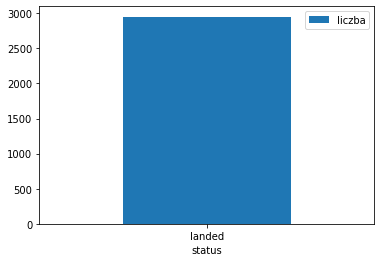

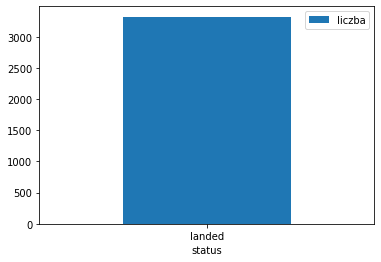

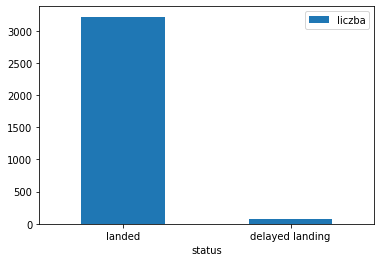

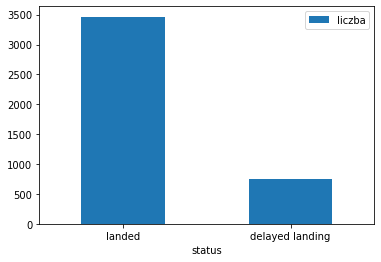

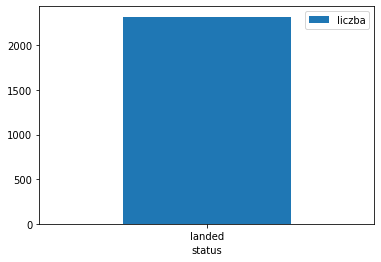

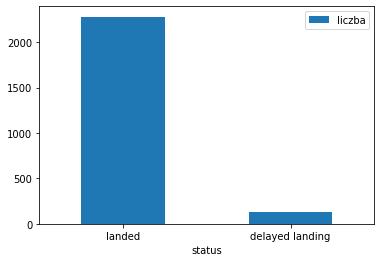

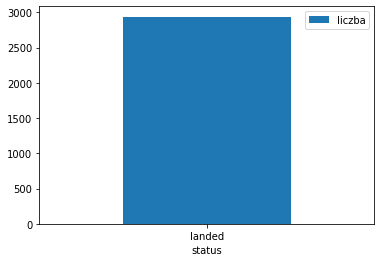

In [54]:
for i in range(0,7):
    try:
        iframe=lotydopragi[lotydopragi["dzientygodnia"]==i]
        iframe.plot.bar(x='status', y='liczba', rot=0)
    except:
        pass

In [55]:
xd

,lot_miasta,dzientygodnia,status,liczba
0,Wrocław-Warsaw,3,landed,13140
1,Gdańsk-Warsaw,3,landed,12689
2,Wrocław-Warsaw,1,landed,12459
3,Wrocław-Warsaw,2,landed,12180
4,Kraków-Warsaw,3,landed,11166
...,...,...,...,...
1650,Rhodes-Warsaw,4,cancelled,1
1651,Los angeles-Warsaw,2,landed,1
1652,Los angeles-Warsaw,1,delayed landing,1
1653,Miami-Warsaw,5,delayed landing,1


In [56]:
xd[xd["status"]=="delayed landing"]

,lot_miasta,dzientygodnia,status,liczba
163,Toronto-Warsaw,3,delayed landing,3729
189,Frankfurt-am-main-Warsaw,1,delayed landing,3403
202,Tel aviv-Warsaw,3,delayed landing,3250
203,Toronto-Warsaw,2,delayed landing,3248
206,Toronto-Warsaw,1,delayed landing,3222
...,...,...,...,...
1641,Seoul-Budapest,2,delayed landing,2
1643,Cancún-Katowice,4,delayed landing,2
1652,Los angeles-Warsaw,1,delayed landing,1
1653,Miami-Warsaw,5,delayed landing,1


In [57]:
ztoronto=xd[xd["lot_miasta"]=="Toronto-Warsaw"]
ztoronto.iloc[:,[1,2,3]].groupby(["dzientygodnia", "status", "liczba"]).count()

Empty DataFrame
Columns: []
Index: [(0, delayed departure, 549), (0, delayed landing, 2758), (1, delayed landing, 3222), (1, landed, 229), (2, delayed landing, 3248), (2, landed, 257), (3, delayed landing, 3729), (4, delayed departure, 711), (4, delayed landing, 2011), (5, delayed, 201), (5, delayed landing, 1911), (5, diverted, 759), (6, delayed landing, 1819), (6, landed, 1196)]

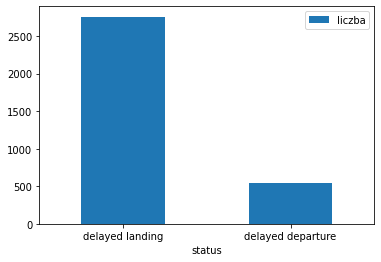

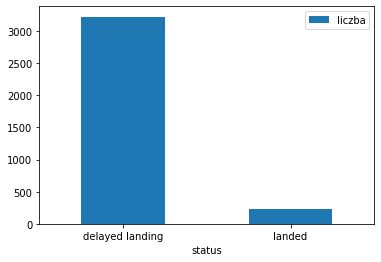

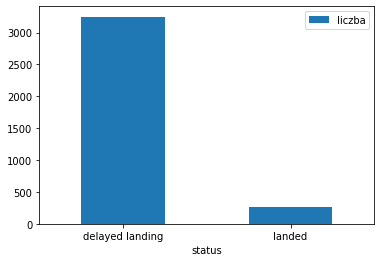

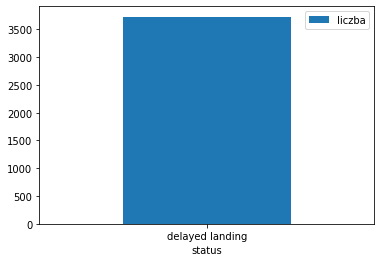

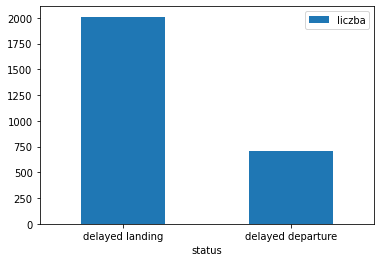

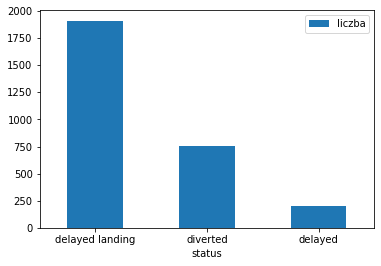

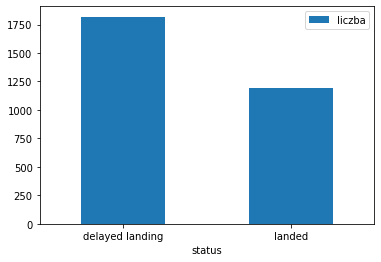

In [58]:
for i in range(0,7):
    try:
        iframe=ztoronto[ztoronto["dzientygodnia"]==i]
        iframe.plot.bar(x='status', y='liczba', rot=0)
    except:
        pass

In [59]:
xd

,lot_miasta,dzientygodnia,status,liczba
0,Wrocław-Warsaw,3,landed,13140
1,Gdańsk-Warsaw,3,landed,12689
2,Wrocław-Warsaw,1,landed,12459
3,Wrocław-Warsaw,2,landed,12180
4,Kraków-Warsaw,3,landed,11166
...,...,...,...,...
1650,Rhodes-Warsaw,4,cancelled,1
1651,Los angeles-Warsaw,2,landed,1
1652,Los angeles-Warsaw,1,delayed landing,1
1653,Miami-Warsaw,5,delayed landing,1


In [60]:
dx1=xd[~(xd["status"]=="landed")]

In [61]:
#w jakie dni nie latać?
tabelka1=xd.groupby(["dzientygodnia", "status"]).sum()

In [62]:
tabelka1["liczba"].to_csv("tabelka1.csv")
tabelka1=pd.read_csv("tabelka1.csv")
tabelka1

,dzientygodnia,status,liczba
0,0,cancelled,466
1,0,delayed,384
2,0,delayed departure,4992
3,0,delayed landing,37453
4,0,diverted,495
5,0,landed,263981
6,1,cancelled,803
7,1,delayed landing,44036
8,1,landed,301255
9,2,cancelled,1470


In [ ]:
#w jakie dni lata najwięcej
xd.groupby(["dzientygodnia"]).agg(
    ile=("liczba", "mean")
)

,ile
dzientygodnia,
0,1320.905579
1,1609.739535
2,1493.289916
3,1423.768683
4,1061.951417
5,1215.133005
6,1092.201681


In [69]:
#w jakie dni lata najwięcej
xd.groupby(["dzientygodnia"]).agg(
    ile=("liczba", "mean")
).plot.bar()



,ile
dzientygodnia,
0,1320.905579
1,1609.739535
2,1493.289916
3,1423.768683
4,1061.951417
5,1215.133005
6,1092.201681


In [89]:
dnityg=xd.groupby(["dzientygodnia"]).agg(
    ile=("liczba", "mean")
)
dnityg=dnityg.reset_index()
from matplotlib import pyplot as plt
dnityg=dnityg.round({"ile":1})

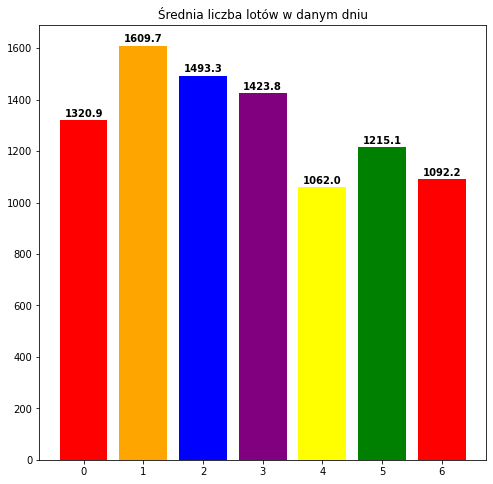

In [90]:
plt.figure(figsize=(8,8))
colors_list = ['Red','Orange', 'Blue', 'Purple', "Yellow", "Green"]
graph = plt.bar(dnityg.dzientygodnia, dnityg.ile, color = colors_list)
plt.title("Średnia liczba lotów w danym dniu")
d = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
            y+height*1.01,
            str(dnityg.ile[d]),
            ha='center',
            weight='bold')
    d+=1

In [ ]:
# w jakie dni spozniaja sie - dla kazdego dnia zrobic oddzielny wykres najlepiej z mean
for i in range(0,7):
    df1=xd[xd["dzientygodnia"]==i].groupby(["status"]).agg(
        ile=("liczba", "mean")
    )
df1.reset_index()

,status,ile
0,cancelled,122.600000
1,delayed,189.666667
2,delayed departure,32.857143
3,delayed landing,407.352273
4,landed,1649.518519


In [93]:
'''
slownik={0:"Niedziela", 1:"Poniedziałek", 2:"Wtorek", 3:"Środa", 4:"Czwartek", 5:"Piątek", 6:"Sobota"}

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(slownik.values()))  # the label locations
x
'''

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
'''
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
'''

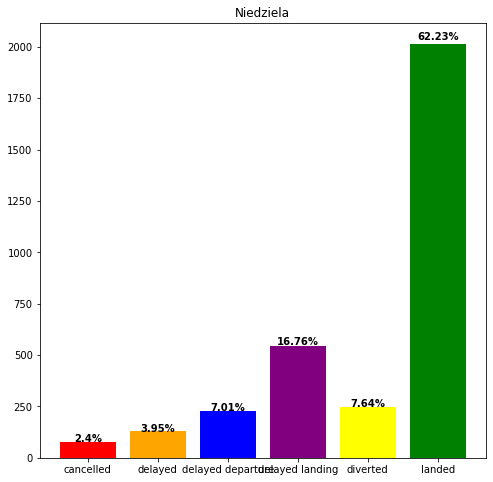

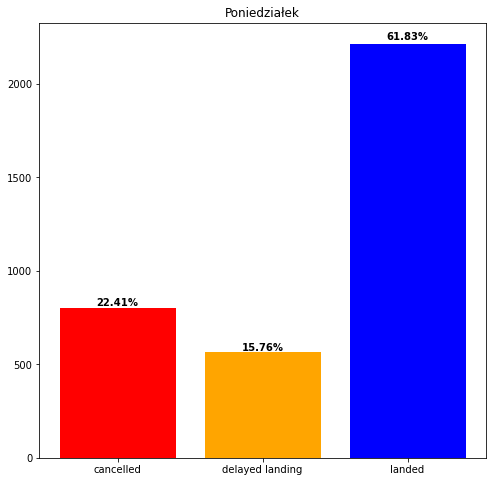

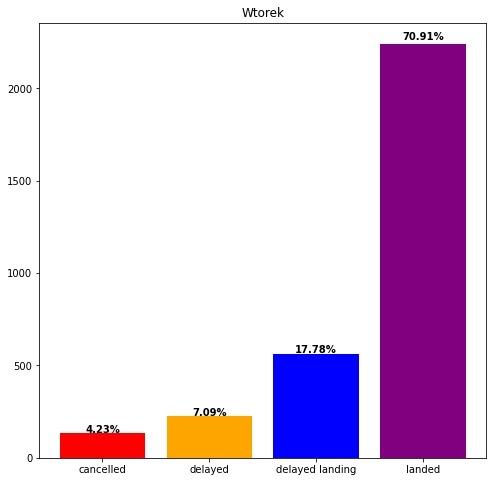

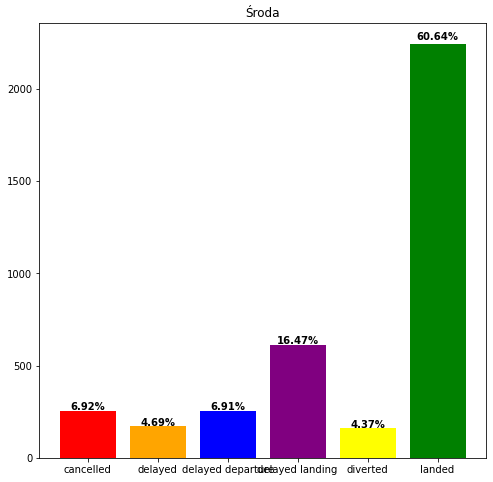

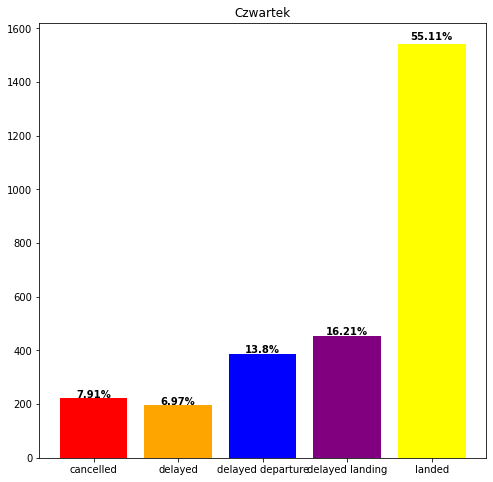

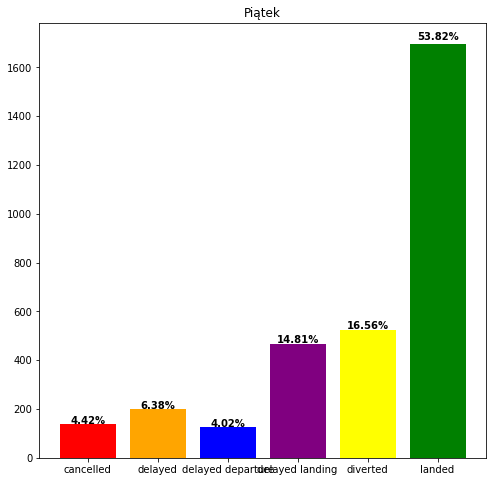

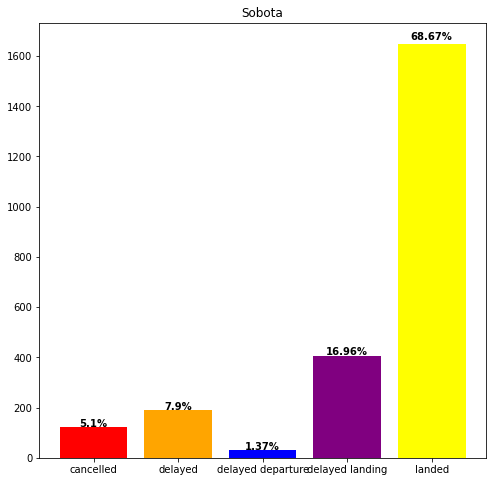

In [ ]:
# w jakie dni spozniaja sie - dla kazdego dnia zrobic oddzielny wykres najlepiej z mean
slownik={0:"Niedziela", 1:"Poniedziałek", 2:"Wtorek", 3:"Środa", 4:"Czwartek", 5:"Piątek", 6:"Sobota"}
for i in range(0,7):
    df1=xd[xd["dzientygodnia"]==i].groupby(["status"]).agg(
        ile=("liczba", "mean")
    )
    df1=df1.reset_index()
    lacznaliczbalotow = df1["ile"].sum()
    df1["procent"] = (df1['ile'] / lacznaliczbalotow ) * 100
    df1=df1.round({"procent":2})
    plt.figure(figsize=(8,8))
    colors_list = ['Red','Orange', 'Blue', 'Purple', "Yellow", "Green"]
    graph = plt.bar(df1.status, df1.ile, color = colors_list)
    plt.title(slownik[i])
    d = 0
    for p in graph:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        plt.text(x+width/2,
                y+height*1.01,
                str(df1.procent[d])+'%',
                ha='center',
                weight='bold')
        d+=1



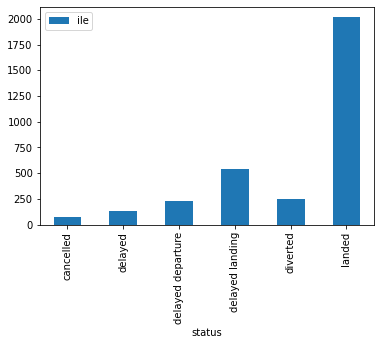

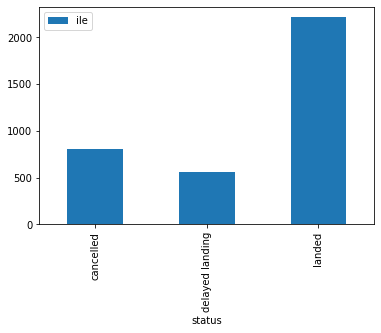

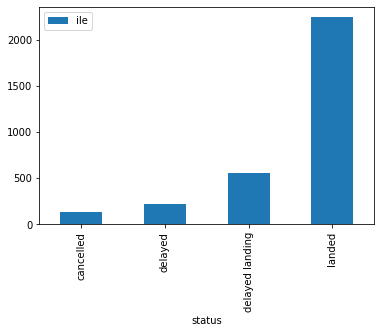

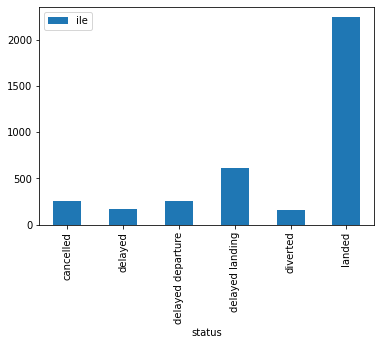

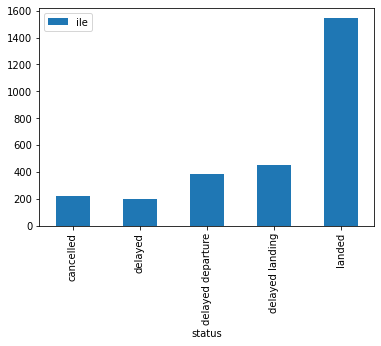

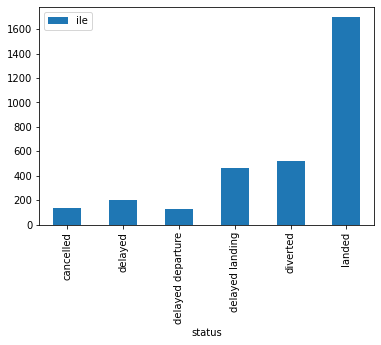

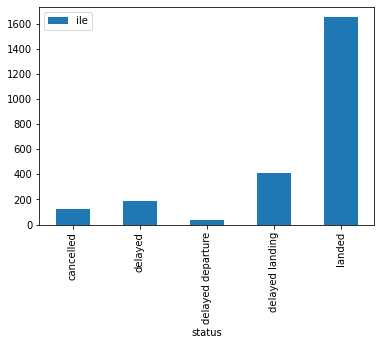

In [ ]:
for i in range(0,7):
    xd[xd["dzientygodnia"]==i].groupby(["status"]).agg(
        ile=("liczba", "mean")
    ).plot.bar()

/var/folders/xd/28t4525s5z71n1c0frmgnf1r0000gn/T/ipykernel_639/1246642225.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xd2replace.replace("delayed landing", "not on time", inplace=True)
/var/folders/xd/28t4525s5z71n1c0frmgnf1r0000gn/T/ipykernel_639/1246642225.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xd2replace.replace("delayed departure", "not on time", inplace=True)
/var/folders/xd/28t4525s5z71n1c0frmgnf1r0000gn/T/ipykernel_639/1246642225.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

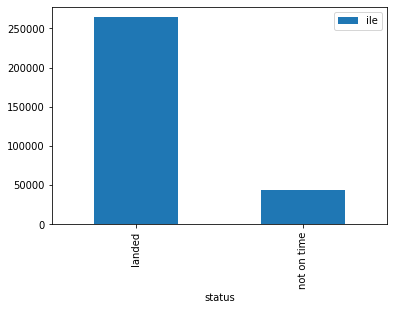

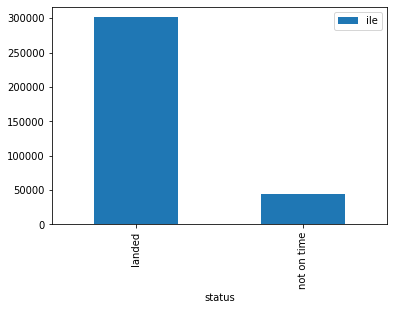

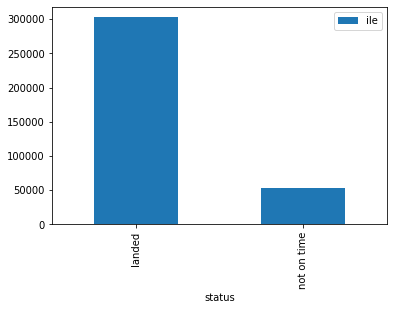

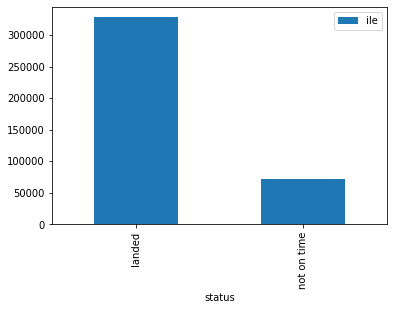

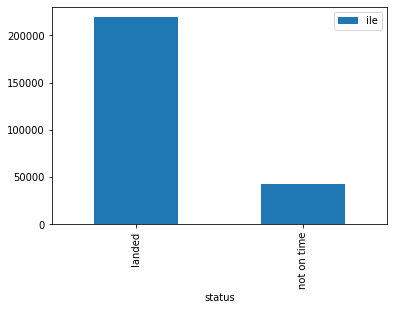

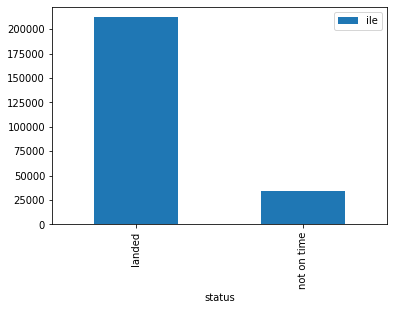

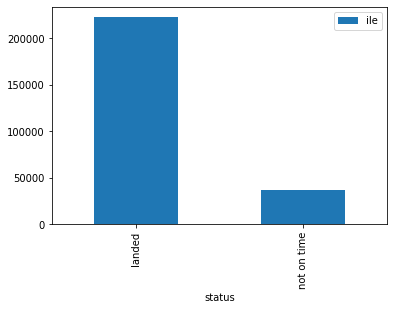

In [ ]:
for i in range(0,7):
    xd2replace=xd[xd["dzientygodnia"]==i]
    xd2replace.replace("delayed landing", "not on time", inplace=True)
    xd2replace.replace("delayed departure", "not on time", inplace=True)
    xd2replace.replace("diverted", "not on time", inplace=True)
    xd2replace.replace("cancelled", "not on time", inplace=True)
    xd2replace.replace("delayed", "not on time", inplace=True)

    xd2replace.groupby(["status"]).agg(
        ile=("liczba", "sum")
    ).plot.bar()

In [ ]:
#for i in lot-name make them save in files png with lot-name names

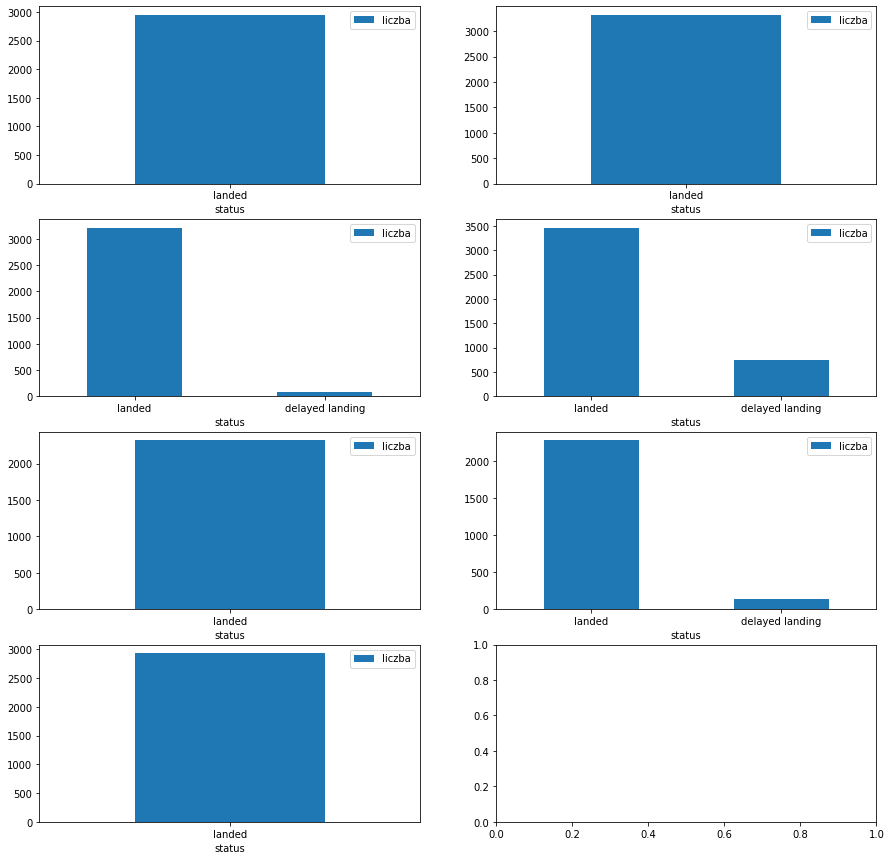

In [ ]:
import pandas as pd
xd1=pd.read_csv("xd.csv")

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(15,15))

lotydoi = xd1[xd1["lot_miasta"]=="Warsaw-Prague"]
lotydoi.iloc[:,[1,2,3]].groupby(["dzientygodnia", "status"]).count()
for i in range(0,7):
    try:
        if i in range(0,2):
            iframe=lotydoi[lotydoi["dzientygodnia"]==i]
            iframe.plot.bar(x='status', y='liczba', rot=0, ax=axes[0,i])
        if i in range(2,4):
            iframe=lotydoi[lotydoi["dzientygodnia"]==i]
            iframe.plot.bar(x='status', y='liczba', rot=0, ax=axes[1,(i-2)])
        if i in range(4,6):
            iframe=lotydoi[lotydoi["dzientygodnia"]==i]
            iframe.plot.bar(x='status', y='liczba', rot=0, ax=axes[2,(i-4)])
        else:
            iframe=lotydoi[lotydoi["dzientygodnia"]==i]
            iframe.plot.bar(x='status', y='liczba', rot=0, ax=axes[3,(i-6)])
    except:
        pass
fig.savefig('full_figure.png', facecolor="white")


In [ ]:
lotydoi

,lot_miasta,dzientygodnia,status,liczba
181,Warsaw-Prague,3,landed,3465
195,Warsaw-Prague,1,landed,3323
208,Warsaw-Prague,2,landed,3217
231,Warsaw-Prague,0,landed,2951
233,Warsaw-Prague,6,landed,2939
297,Warsaw-Prague,4,landed,2321
304,Warsaw-Prague,5,landed,2280
713,Warsaw-Prague,3,delayed landing,749
1407,Warsaw-Prague,5,delayed landing,133
1496,Warsaw-Prague,2,delayed landing,81
